In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# MatPlotlib 单变量直方图

## 1.3 加载 安斯科姆 数据集

In [4]:
# 加载数据
anscombe = pd.read_csv("data/anscombe.csv")
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [15]:
# 查看各组数据
anscombe[anscombe['dataset'] == "I"]
anscombe[anscombe['dataset'] == "II"]
anscombe[anscombe['dataset'] == "III"]
anscombe[anscombe['dataset'] == "IV"]

# 查看上述各组数据的详情
anscombe.groupby('dataset').describe().T

dataset          I         II        III         IV
x count  11.000000  11.000000  11.000000  11.000000
  mean    9.000000   9.000000   9.000000   9.000000
  std     3.316625   3.316625   3.316625   3.316625
  min     4.000000   4.000000   4.000000   8.000000
  25%     6.500000   6.500000   6.500000   8.000000
  50%     9.000000   9.000000   9.000000   8.000000
  75%    11.500000  11.500000  11.500000   8.000000
  max    14.000000  14.000000  14.000000  19.000000
y count  11.000000  11.000000  11.000000  11.000000
  mean    7.500909   7.500909   7.500000   7.500909
  std     2.031568   2.031657   2.030424   2.030579
  min     4.260000   3.100000   5.390000   5.250000
  25%     6.315000   6.695000   6.250000   6.170000
  50%     7.580000   8.140000   7.110000   7.040000
  75%     8.570000   8.950000   7.980000   8.190000
  max    10.840000   9.260000  12.740000  12.500000

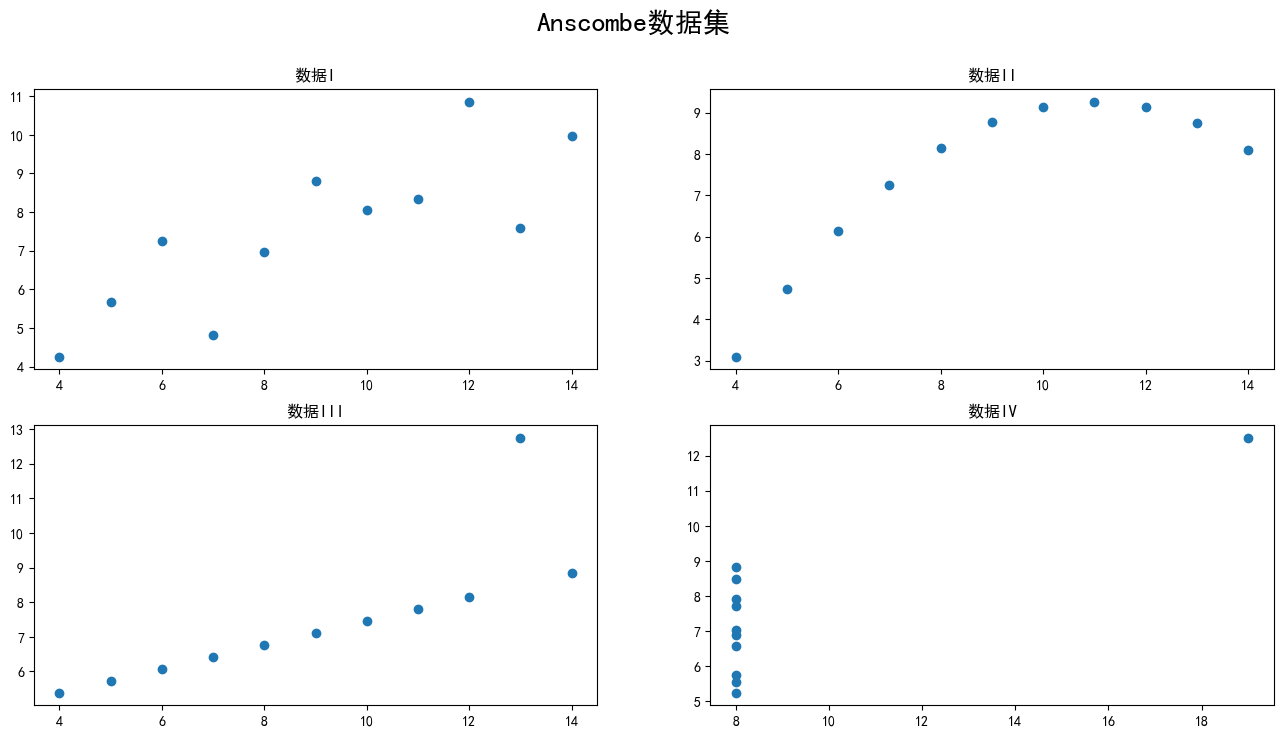

In [30]:
# 4. 通过查看分析统计结果,发现上述数据高度相似
# 4.1 创建画布
fig = plt.figure(figsize=(16,8))
# 4.2 创建四个组
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
# 4.3 具体的绘制四个子图
ax1.scatter(anscombe[anscombe['dataset'] == "I"]["x"], anscombe[anscombe['dataset'] == "I"]["y"])
ax2.scatter(anscombe[anscombe['dataset'] == "II"]["x"], anscombe[anscombe['dataset'] == "II"]["y"])
ax3.scatter(anscombe[anscombe['dataset'] == "III"]["x"], anscombe[anscombe['dataset'] == "III"]["y"])
ax4.scatter(anscombe[anscombe['dataset'] == "IV"]["x"], anscombe[anscombe['dataset'] == "IV"]["y"])
# 4.4 设置子标题
ax1.set_title("数据I")
ax2.set_title("数据II")
ax3.set_title("数据III")
ax4.set_title("数据IV")
# 4.5 设置大标题
fig.suptitle("Anscombe数据集",fontsize=20)
# 4.6 具体的绘制
plt.show()


# 1.4 Matplotlib绘图 - 单变量 - 直方图


In [32]:
tips = pd.read_csv("data/tips.csv")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <BarContainer object of 10 artists>)

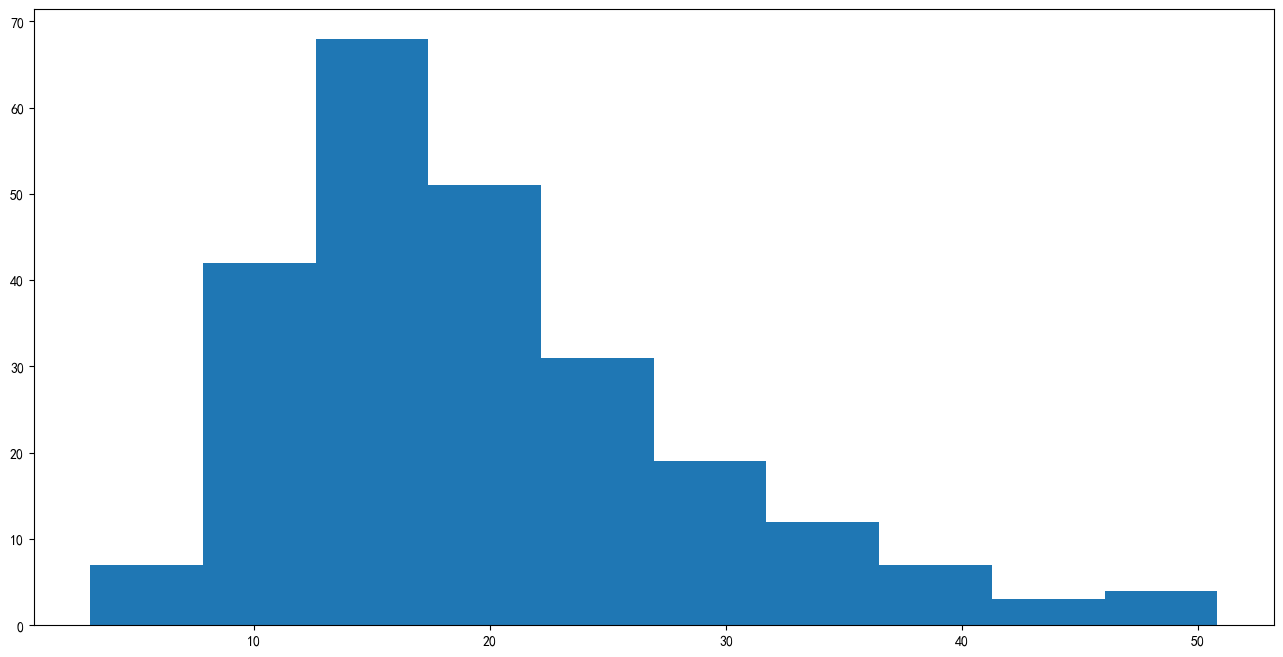

In [36]:
fig = plt.figure(figsize=(16,8))
# x , 表示 x 轴要显示的内容,bins几个区间(划分 10 个区间),其实就是起始值,结束值然后生成区间加+1 个 的等差数列
plt.hist(x=tips['total_bill'],bins=10)
# plt.show()

## 1.5 Matplotlib 双变量 -- 散点图

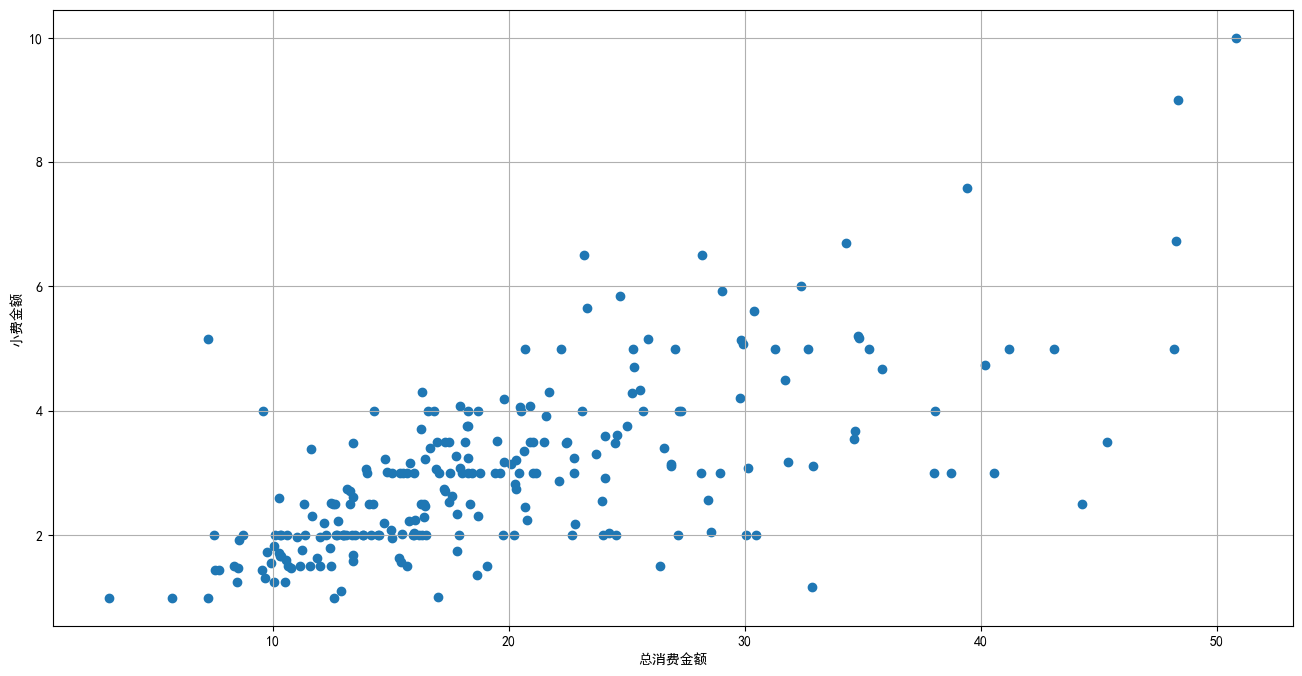

In [40]:
# 1. 创建画布
plt.figure(figsize=(16,8))
# 2. 绘制散点图,展示双变量(两个值的关系)
plt.scatter(x=tips['total_bill'],y=tips['tip'])
plt.xlabel('总消费金额')
plt.ylabel("小费金额")
plt.grid()
plt.show()

## 1.6 Matplotlib 多变量 -- 散点图

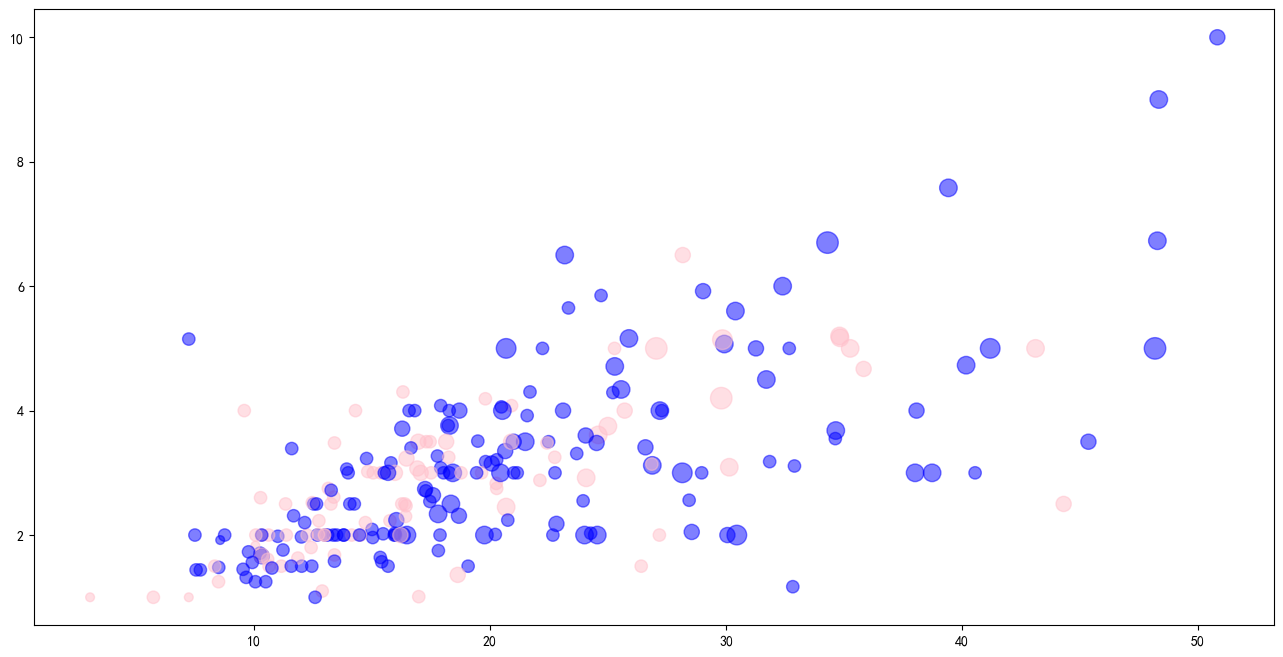

In [55]:
def recode_sex(sex):
    if sex == "Female":
        return 'pink'
    else:
        return "blue"

tips.loc[:,'sexColor'] = tips['sex'].apply(recode_sex)

fig = plt.figure(figsize=(16,8))
plt.scatter(tips['total_bill'],tips['tip'],c=tips.sexColor,s=tips['size']*40,alpha=0.5)

# 2. Pandas 绘图

In [3]:
review = pd.read_csv("data/winemag-data_first150k.csv")
review

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...,...
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


## 2.1 单变量-柱状图

<Axes: xlabel='province'>

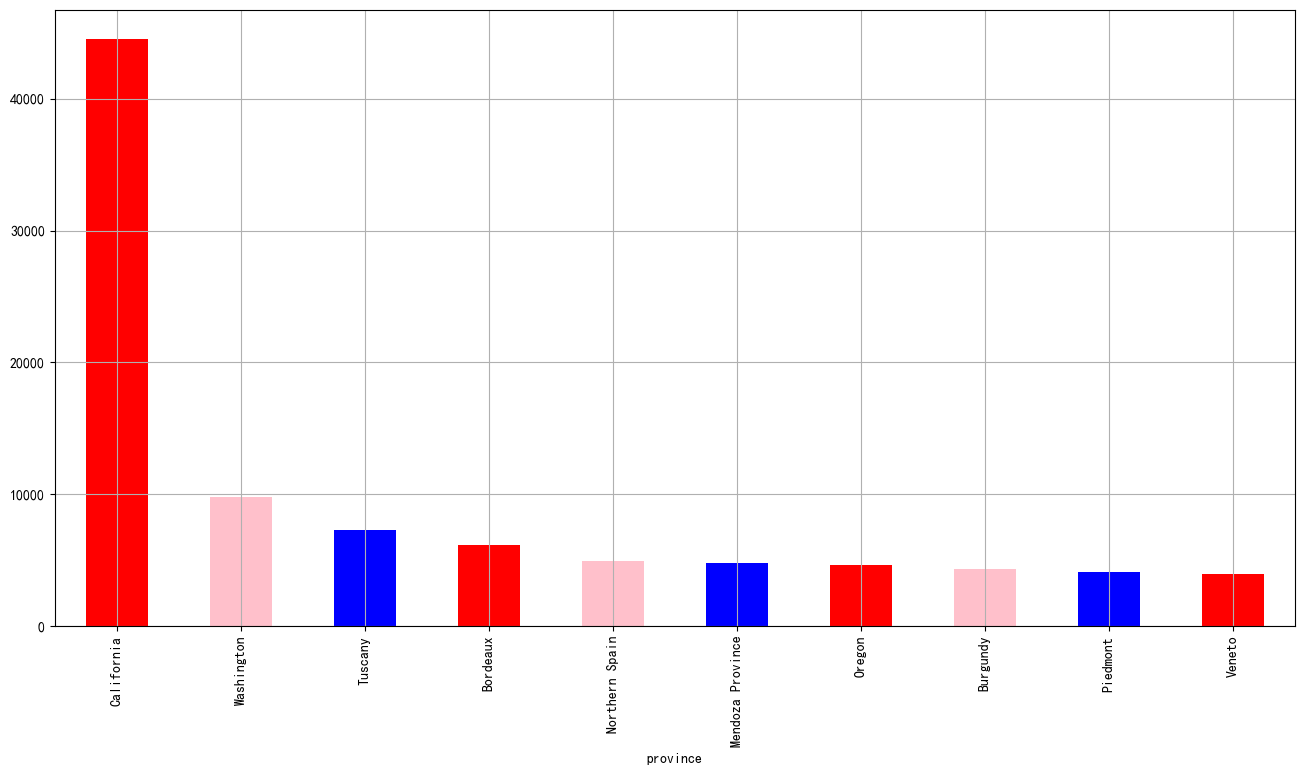

In [59]:
kwargs = dict(figsize=(16,8),color=['red','pink','blue'],grid=True)
review["province"].value_counts().head(10).plot.bar(**kwargs)

<Axes: xlabel='province'>

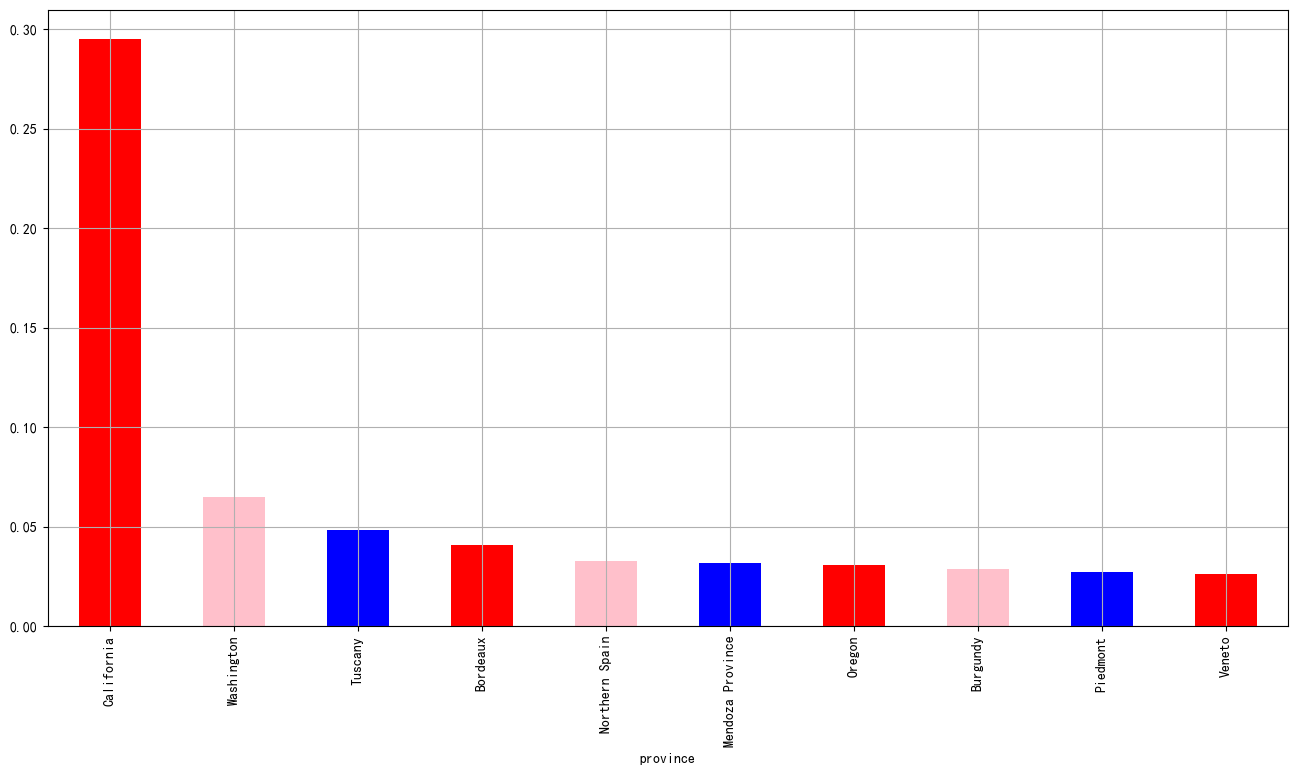

In [62]:
# 计算加利福尼亚葡萄酒占总数的百分比
(review['province'].value_counts().head(10) / len(review)).plot.bar(**kwargs)

<Axes: xlabel='points'>

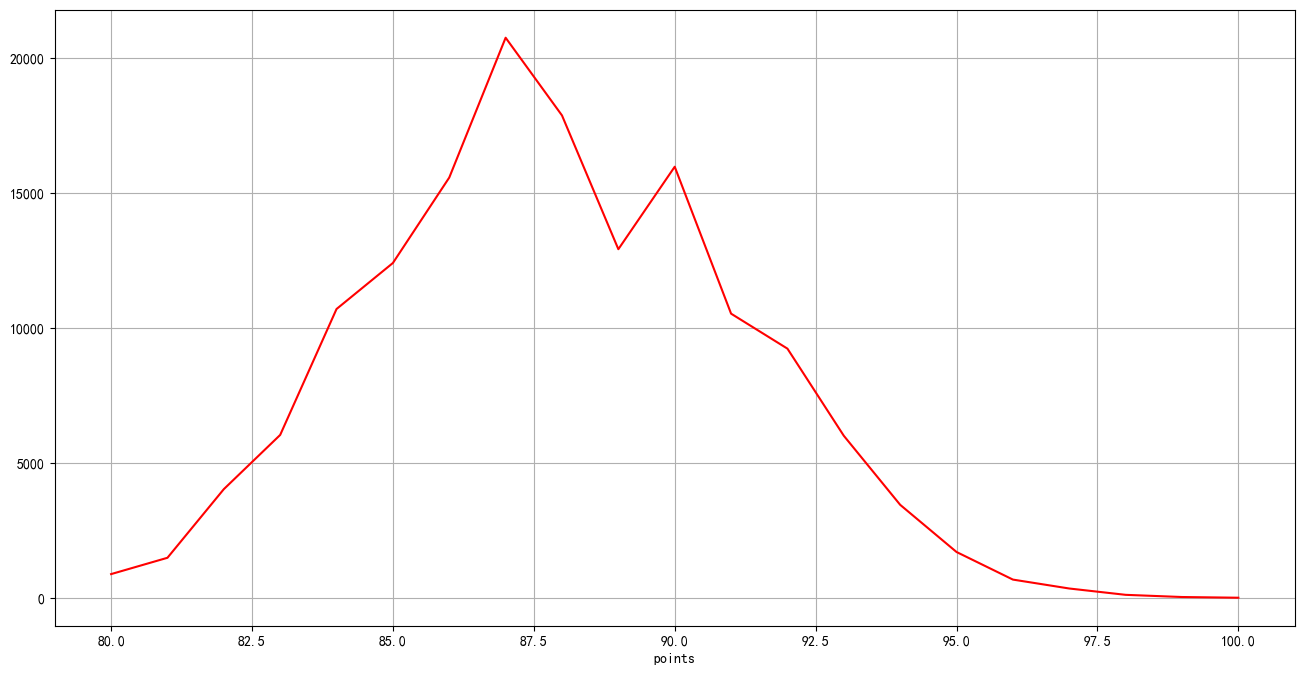

In [75]:
# 需求3. 给出评分数量的分布情况
# review['points'].value_counts().sort_index().plot.area()
# review['province'].value_counts().head(10).plot.pie()
review['points'].value_counts().sort_index().plot.line(**kwargs)

# 3. seaborn 绘图


## 3.1 Seaborn - 单变量

In [4]:
tips = pd.read_csv("data/tips.csv")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: xlabel='total_bill', ylabel='Count'>

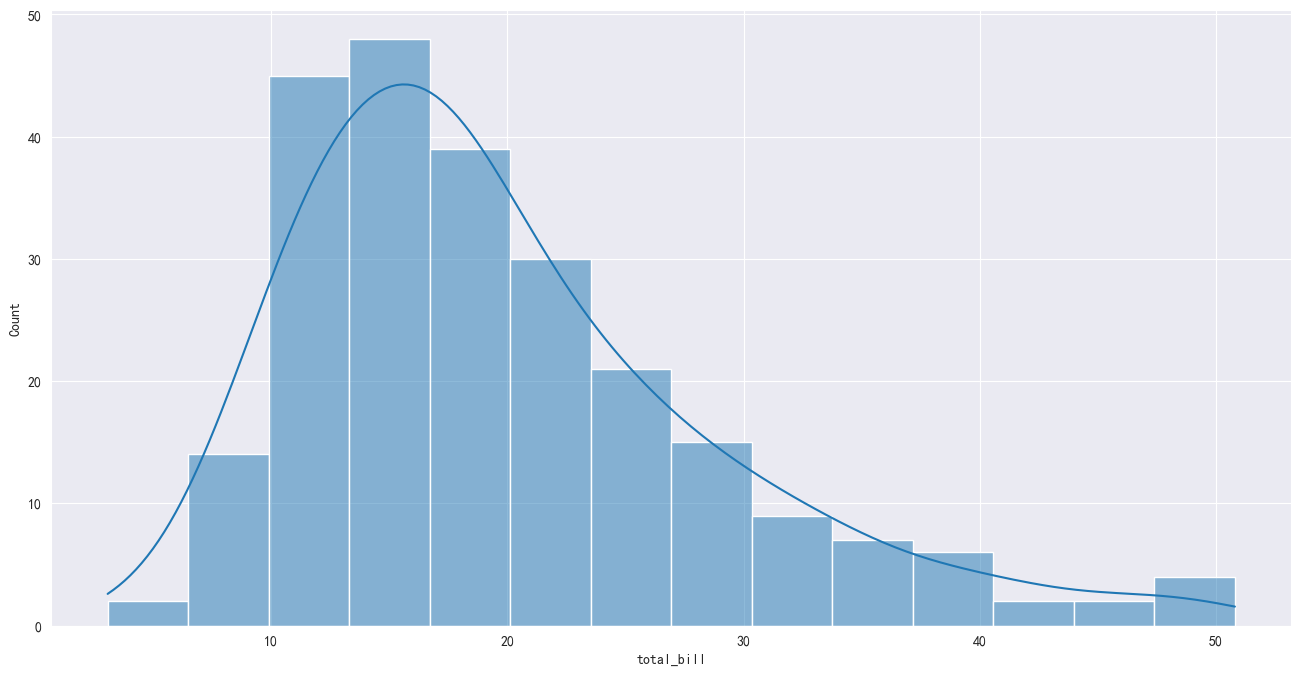

In [5]:
# 2. 需求1: 绘制 总小费金额的 直方图
# step1: 创建画布,坐标轴负向
fig,ax = plt.subplots(figsize=(16,8))
# 绘图 kde: 核密度折线图,用于分析数据的正态分布情况,样本数据,数据分布...
sns.histplot(data=tips,x='total_bill',kde=True)

<Axes: xlabel='total_bill', ylabel='Density'>

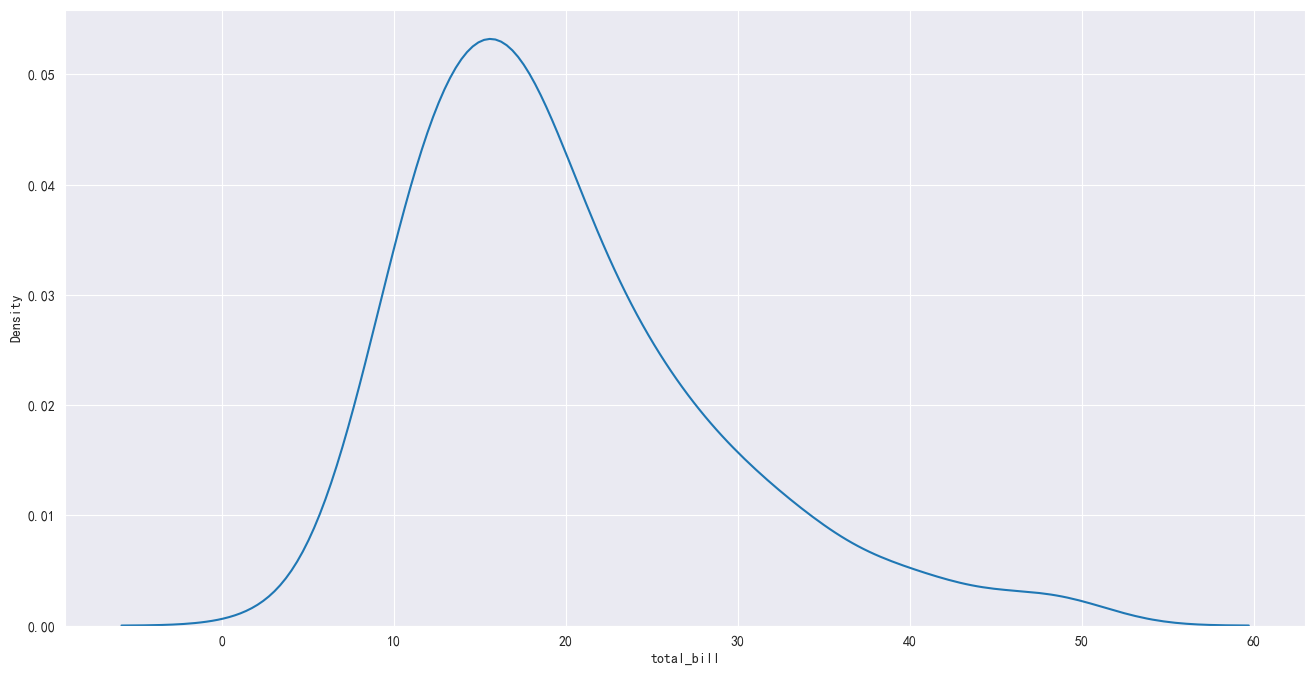

In [6]:
# 绘制总消费的密度图
fig,ax = plt.subplots(figsize=(16,8))
sns.kdeplot(data=tips,x='total_bill')

<Axes: xlabel='day', ylabel='count'>

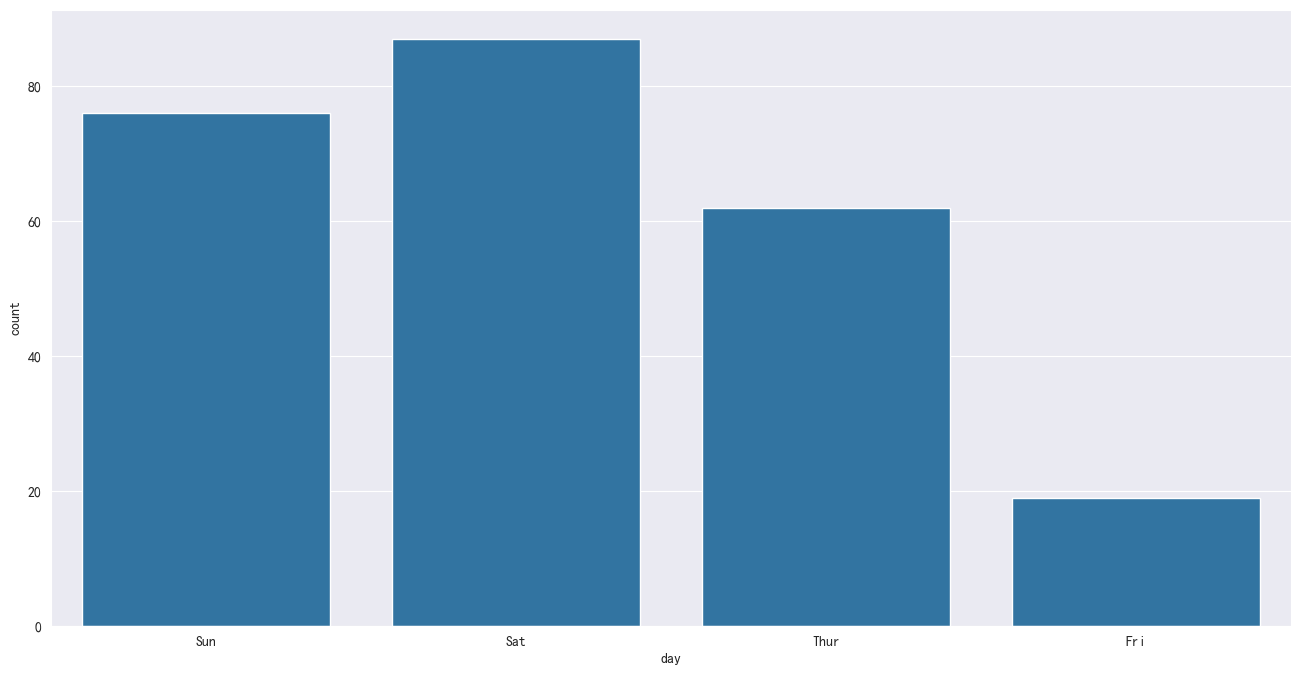

In [7]:
# 绘制按天Day统计的 直方图
fig,ax = plt.subplots(figsize=(16,8))
sns.countplot(data=tips,x='day')

<Axes: xlabel='total_bill', ylabel='tip'>

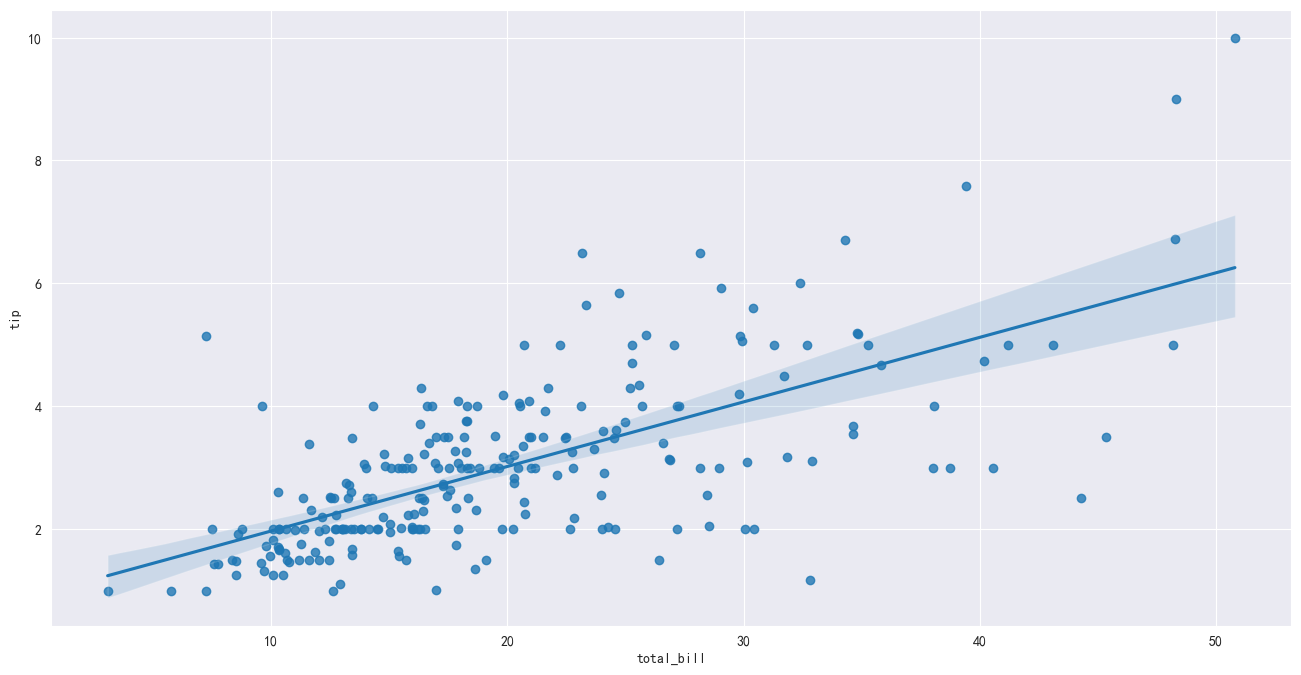

In [9]:
# 散点图 + 拟合回归线
fig,ax = plt.subplots(figsize=(16,8))
sns.regplot(x=tips['total_bill'],y=tips['tip'],data=tips)

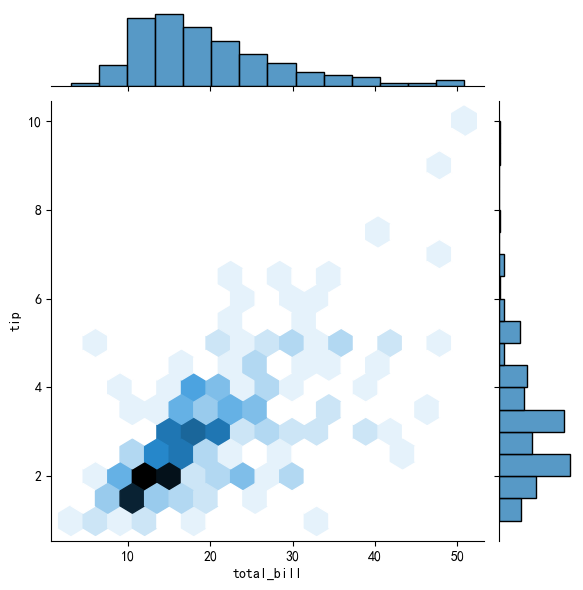

In [97]:
# 蜂巢图
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')
plt.show()

# 3.2.2 绘制 2D 密度图

<Axes: xlabel='total_bill', ylabel='tip'>

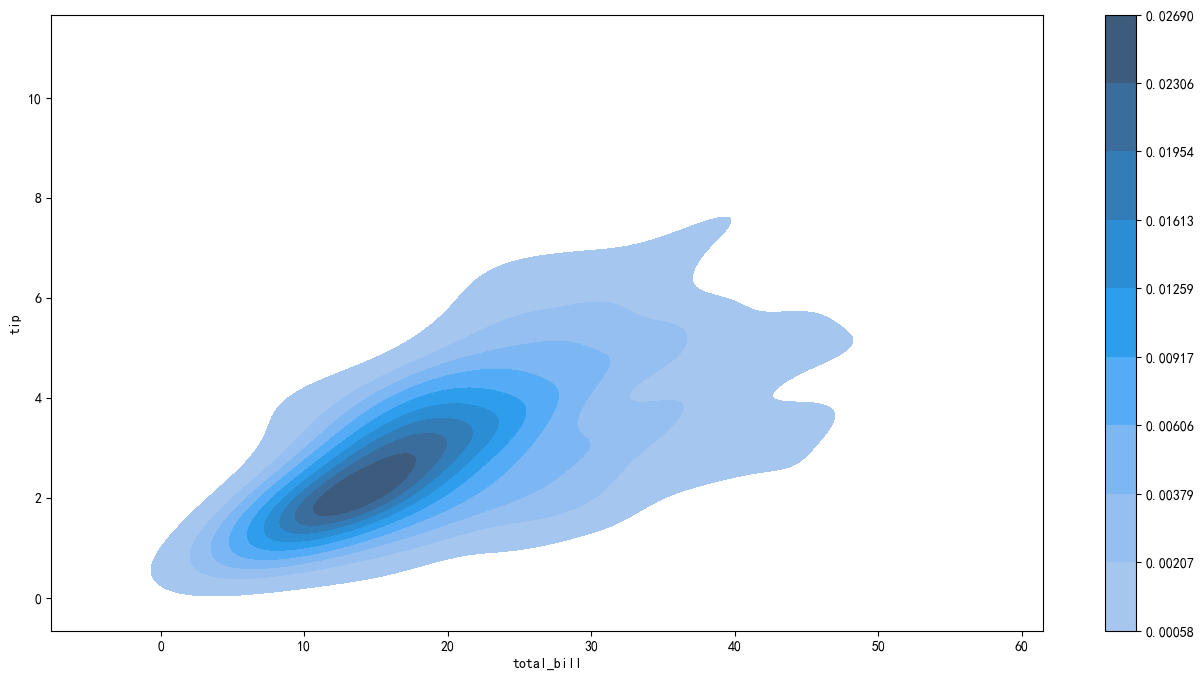

In [100]:
fig,ax = plt.subplots(figsize=(16,8))
sns.kdeplot(data=tips,x='total_bill',y='tip',fill=True,cbar=True)

## 3.2.3 绘制箱体图

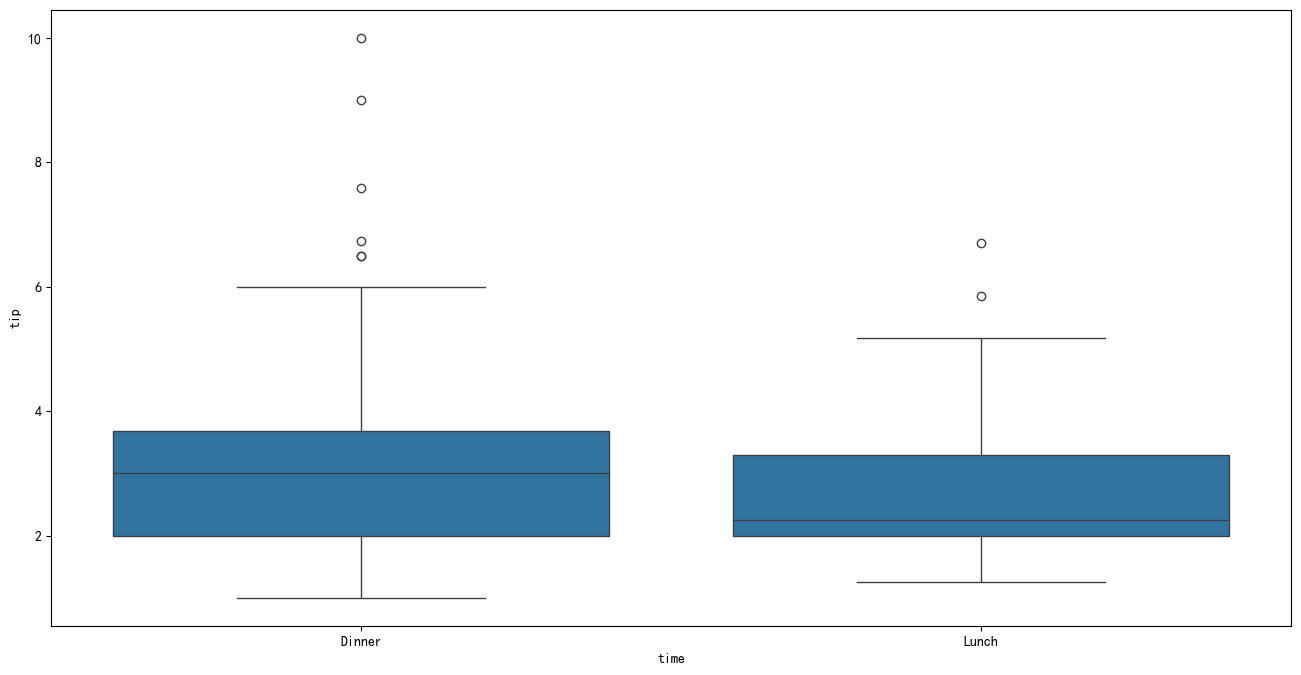

In [104]:
fig,ax = plt.subplots(figsize=(16,8))
ax = sns.boxplot(data=tips,x='time',y='tip')

In [105]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [107]:
## 3.2.4 小提琴图

<Axes: xlabel='time', ylabel='tip'>

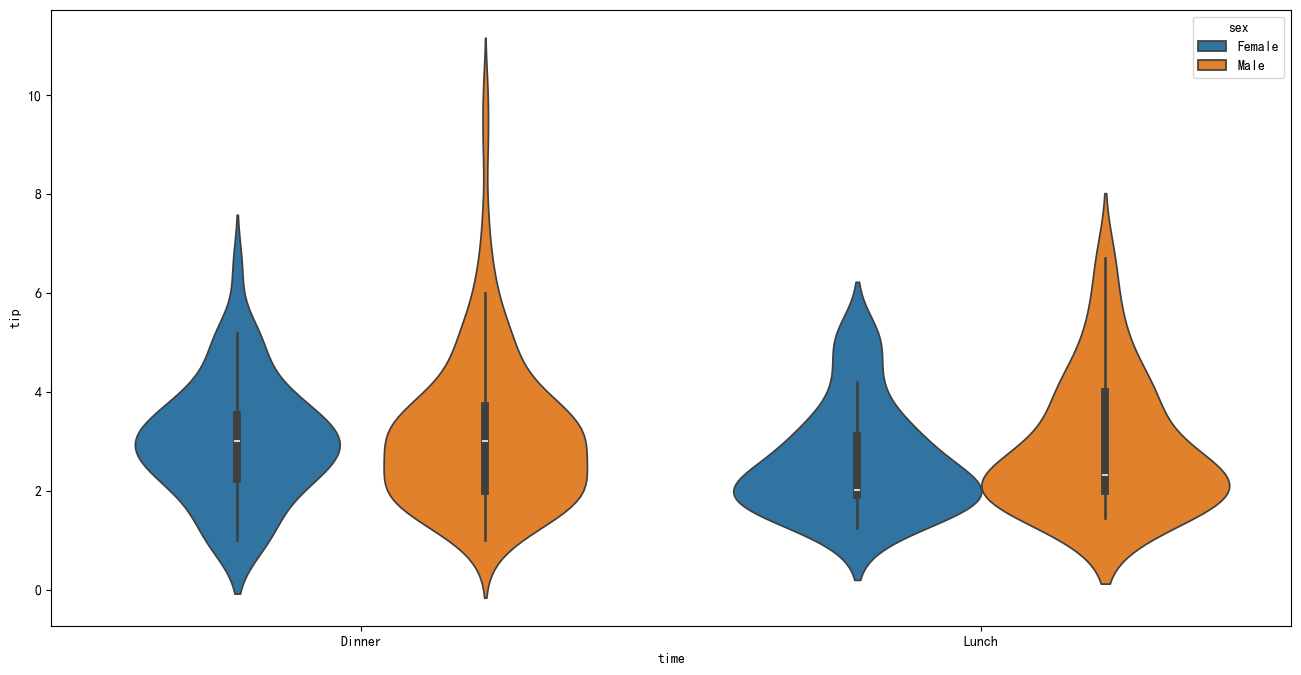

In [111]:
plt.subplots(figsize=(16,8))
sns.violinplot(data=tips,x='time',y='tip',hue="sex")